# 주식 분석/백테스트 정리

---
[FinanceDataReader 사용자 안내서](https://financedata.github.io/posts/finance-data-reader-users-guide.html)<br>
[경기선행지수 확인](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20FRED%20%EA%B2%BD%EA%B8%B0%20%EC%84%A0%ED%96%89%20%EC%A7%80%ED%91%9C.ipynb)<br>
[상장주식정보](https://nbviewer.jupyter.org/gist/FinanceData/12440c298682c44758e4789909a3f333)<br>
[지표정리](https://github.com/FinanceData/FinanceDataReader/wiki/Quick-Reference)<br>
[기타안내](https://github.com/FinanceData/FinanceDataReader/wiki/Release-Note-0.9.10)<br>


---
한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리 

In [13]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [14]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

개요
금융 데이터를 다루는데 가장 기본이 되는 데이터는 거래소별 전체 종목 코드와 가격 데이터 이다.

pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. (현재 버전 : pandas_datareader 0.6.0) 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

* 종목 코드
 + 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500

* 가격 데이터
 + 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
 + 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
 + 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
 + 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
 + 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원 가격, 빗썸)

In [5]:
#사용
# pip install FinanceDataReader
# pip install openpyxl
import FinanceDataReader as fdr
fdr.__version__

'0.9.12'

### 전체 종목 코드
종목 데이터 전체를 얻기 위해 사용할 수 있는 거래소 심볼은 다음과 같다

한국

심볼|	  거래소 
----|----
KRX |  	KRX  전체종목
KOSPI|	KOSPI 종목
KOSDAQ|	KOSDAQ 종목
KONEX|	KONEX 종목

미국

심볼	|  거래소   
----|----
NASDAQ|	나스닥 종목
NYSE|뉴욕 증권거래소 종목
AMEX|	AMEX 종목
SP500|	S&P 500 종목



In [10]:
import FinanceDataReader as fdr
import os 

path = './fdr_output'
os.makedirs(path, exist_ok=True)
# 한국거래소 상장종목 전체

df_krx = fdr.StockListing('KRX')
df_krx.head()
df_krx.to_csv(path + '/krx.csv',header=True,index=False, encoding='euc-kr')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [11]:
import requests
import json
from pandas import json_normalize

path = './fdr_output'
os.makedirs(path, exist_ok=True)
url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df.to_excel(path +'/etf_list.xlsx',header=True,index=False)

In [9]:
import FinanceDataReader as fdr

# NASDAQ 상장종목 전체
df_NASDAQ = fdr.StockListing('NYSE')
df_NASDAQ.head()
df_NASDAQ.to_csv('NYSE.csv',header=True,index=False, encoding='euckr')

100%|█████████████████████████████████████| 3113/3113 [00:10<00:00, 308.20it/s]


In [7]:
import FinanceDataReader as fdr

# SP500 상장종목 전체
df_SP500 = fdr.StockListing('SP500')
df_SP500.head()
df_SP500.to_csv('SP500.csv',header=True,index=False)

C:\Dev\Miniconda3\lib\site-packages\FinanceDataReader\wikipedia\listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


In [16]:
len(df_krx)

2553

가격 데이터 - 국내주식
단축 코드(6자리)를 사용.

코스피 종목: 068270(셀트리온), 005380(현대차) 등
코스닥 종목: 215600(신라젠), 151910(나노스) 등### 

In [17]:
import FinanceDataReader as fdr

#  셀트리온, 2018년
df = fdr.DataReader('068270', '2020')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,181000,183000,176000,180000,621826,-0.005525
2020-01-03,181500,182500,177000,177500,498043,-0.013889
2020-01-06,174000,175500,172500,173000,575093,-0.025352
2020-01-07,174500,179000,174000,178000,457371,0.028902
2020-01-08,175000,176000,170500,173000,891120,-0.028090
2020-01-09,178000,179500,175000,177000,519560,0.023121
2020-01-10,178500,178500,175000,177500,431127,0.002825
2020-01-13,179000,181000,178500,179500,453131,0.011268
2020-01-14,179500,181500,177000,178000,506237,-0.008357


In [53]:
import FinanceDataReader as fdr

# 나스닥100, 2017년~현재
df = fdr.DataReader('133690', '2020')
df.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-06-01,52320,53080,52320,52675,76786,0.008327
2020-06-02,52700,52835,52515,52835,70802,0.003037
2020-06-03,53115,53115,52710,52920,108881,0.001609
2020-06-04,52975,53055,52710,52910,81665,-0.000189
2020-06-05,52845,52845,52485,52530,74192,-0.007182
2020-06-08,53160,53195,53030,53125,93598,0.011327
2020-06-09,53210,53220,52985,53150,105213,0.000471
2020-06-10,53250,53705,53210,53395,112774,0.004610
2020-06-11,53510,53830,53485,53505,90241,0.002060


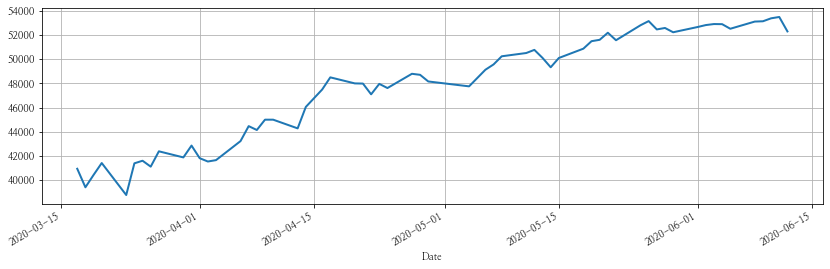

In [56]:
import FinanceDataReader as fdr

# 나스닥100, 2017년~현재

df = fdr.DataReader('133690', '2015')
df['Close'].tail(60).plot()

In [19]:
import FinanceDataReader as fdr

# 테슬라(TSLA), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('TSLA', '2018-01-01', '2020-06-11')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-06-05,885.66,877.84,886.52,866.20,7810000.0,0.0246
2020-06-08,949.92,918.56,950.00,909.46,14170000.0,0.0726
2020-06-09,940.67,940.50,954.27,924.56,11390000.0,-0.0097
2020-06-10,1025.05,992.36,1027.36,982.67,18560000.0,0.0897
2020-06-11,972.84,990.20,1018.96,972.00,15920000.0,-0.0509


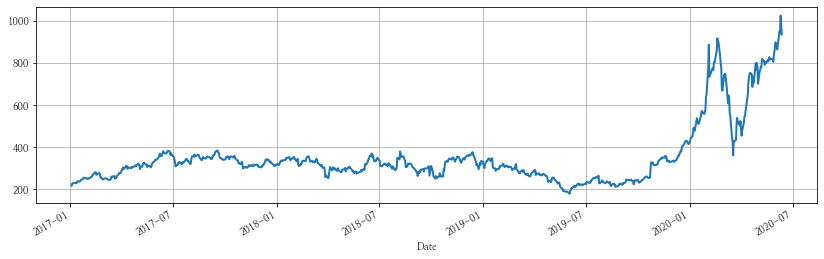

In [20]:
import FinanceDataReader as fdr

# 테슬라(TSLA), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('TSLA', '2017')
df['Close'].plot()

# 한국 지수
심볼|	설명
----|----
KS11|	KOSPI 지수
KQ11|	KOSDAQ 지수
KS50|	KOSPI 50 지수
KS100|	KOSPI 100
KRX100|	KRX 100
KS200|	코스피 200

# 미국 지수
심볼|	설명
----|----
DJI|	다우존스 지수
IXIC|	나스닥 지수
US500|	S&P 500 지수
VIX|	S&P 500 VIX
※ DJI, IXIC, US500 가 미국 3대 지수

# 국가별 주요 지수<br>
심볼 | 설명
----|----
JP225 | 닛케이 225 선물
STOXX50E	| Euro Stoxx 50
CSI300 |	CSI 300 (중국)
HSI|	항셍 (홍콩)
FTSE|	영국 FTSE
DAX|	독일 DAX 30
CAC|	프랑스 CAC 40

<AxesSubplot:xlabel='Date'>

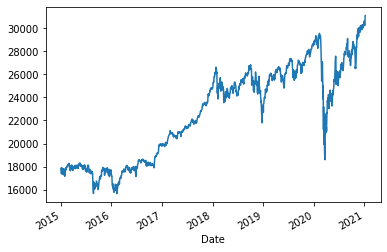

In [1]:
import FinanceDataReader as fdr

# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('DJI', '2015')
df['Close'].plot()

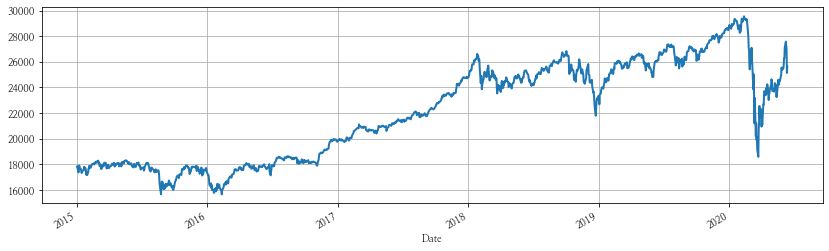

In [21]:
# 다우지수, 2015년~현재

df = fdr.DataReader('DJI', '2015')
df['Close'].plot()

## 환율
심볼	설명
USD/KRW	달러당 원화 환율
USD/EUR	달러당 유로화 환율
USD/JPY	달러당 엔화 환율
CNY/KRW	위엔화 원화 환율
EUR/USD	유로화 달러 환율
USD/JPY	달러 엔화 환율
JPY/KRW	엔화 원화 환율
AUD/USD	오스트레일리아 달러 환율
EUR/JPY	유로화 엔화 환율
USD/RUB	달러 루블화 

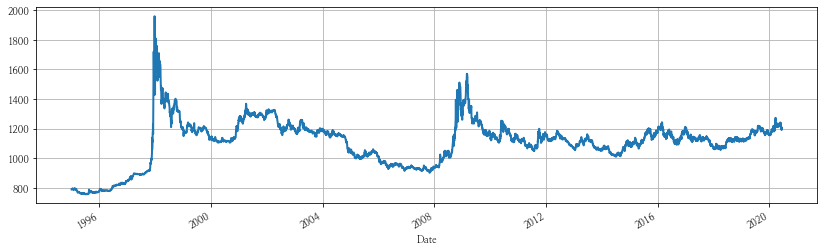

In [23]:
import FinanceDataReader as fdr

# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

## 암호화폐 가격 (UDS)
암호 화폐 달러화 가격 (Bitfinex)

심볼	설명
BTC/USD	비트코인 달러 가격
ETH/USD	이더리움 달러 가격
XRP/USD	리플 달러 가격
BCH/USD	비트코인 캐시 달러 가격
EOS/USD	이오스 달러 가격
LTC/USD	라이트 코인 달러 가격
XLM/USD	스텔라 달러 가격

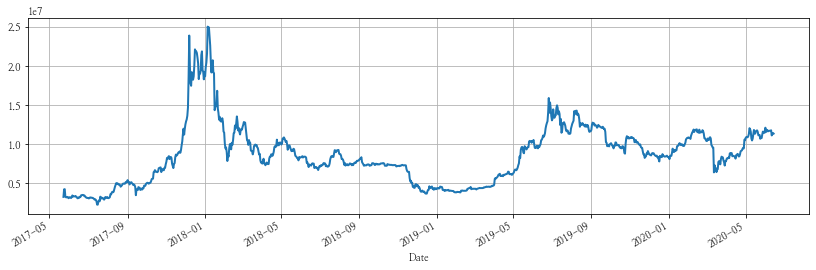

In [24]:
import FinanceDataReader as fdr

# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

In [1]:
# 이동평균 전략 주식거래 백테스팅

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
import FinanceDataReader as fdr
fdr.__version__

class SmaCross(Strategy):
    def init(self):
        Close = self.data.Close
        self.ma1 = self.I(SMA, Close, 5)  # 10일 이동평균선
        self.ma2 = self.I(SMA, Close, 20) # 20일 이동평균선

    def next(self):
        if crossover(self.ma1, self.ma2): # 5일 이동평균선이 20일을 돌파하면
            self.buy() # 매수
#         elif crossover(self.ma2, self.ma1): # 20일 이동평균선이 5일을 깨면
#             self.sell() #매도

# TIGER Nasdaq100, 2014년~현재
data = fdr.DataReader('TSLA', '2018')
print(data.head())

# 초기투자금 10000, commission 비율 0.002 임의 지정
bt = Backtest(data, SmaCross,
              cash =10000, commission=.002)

bt.run()
bt.plot()

#https://programmingfbf7290.tistory.com/entry/1-%EC%8B%A4-%EA%B1%B0%EB%9E%98-%ED%9B%84-%EB%B3%B4%EC%99%84%EB%90%9C-ETF-%EB%B3%80%EB%8F%99%EC%84%B1-%EB%8F%8C%ED%8C%8C-%EC%A0%84%EB%9E%B5?category=681230
#https://mkjjo.github.io/finance/2019/07/18/movingaverage.html
#https://www.quantstart.com/articles/backtesting-systematic-trading-strategies-in-python-considerations-and-open-source-frameworks
#https://wendys.tistory.com/181

C:\Dev\Miniconda3\lib\site-packages\backtesting\_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

            Close   Open   High    Low      Volume  Change
Date                                                      
2018-01-02  64.11  62.40  64.42  62.20  21760000.0  0.0295
2018-01-03  63.45  64.20  65.05  63.11  22610000.0 -0.0103
2018-01-04  62.92  62.57  63.71  61.14  49730000.0 -0.0084
2018-01-05  63.32  63.32  63.45  62.40  22960000.0  0.0064
2018-01-08  67.28  63.20  67.40  63.10  49300000.0  0.0625


C:\Dev\Miniconda3\lib\site-packages\backtesting\backtesting.py:1042: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version.  check index.inferred_type instead
  if (not data.index.is_all_dates and
C:\Dev\Miniconda3\lib\site-packages\backtesting\backtesting.py:1057: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  if len(data.columns & {'Open', 'High', 'Low', 'Close', 'Volume'}) != 5:
